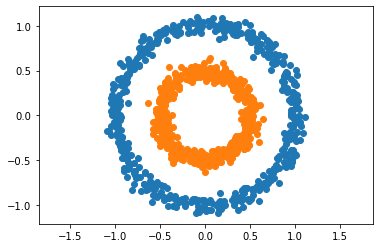

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import *

# Create the dataset

#number of registers
n = 1000

#number of characteristics per register
p = 2

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1])
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1])
plt.axis("equal")
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

In [35]:
network = tf.keras.models.Sequential()
network.add(layers.Input(shape = (2, )))
network.add(layers.Dense(8, activation = 'tanh'))
network.add(layers.Dense(8, activation = 'tanh'))
network.add(layers.Dense(8, activation = 'tanh'))
network.add(layers.Dense(8, activation = 'tanh'))
network.add(layers.Dense(1, activation = 'sigmoid'))

In [36]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
network.compile(optimizer =opt,
              loss='mean_squared_error',
              metrics=['accuracy'])

In [61]:
res = 100
# Coordendadas del mapa de predicción.
x0 = np.linspace(-1.5, 1.5, res)
x1 = np.linspace(-1.5, 1.5, res)
# Input con cada combo de coordenadas del mapa de predicción.
pX = np.array(np.meshgrid(x0, x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
pY = np.zeros((res, res)) + 0.5


In [72]:
network.fit(X, Y, epochs = 1000)

p - loss: 4.1025e-04 - accuracy: 1.0000
Epoch 813/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0951e-04 - accuracy: 1.0000
Epoch 814/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0892e-04 - accuracy: 1.0000
Epoch 815/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0827e-04 - accuracy: 1.0000
Epoch 816/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0732e-04 - accuracy: 1.0000
Epoch 817/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0692e-04 - accuracy: 1.0000
Epoch 818/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0603e-04 - accuracy: 1.0000
Epoch 819/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0531e-04 - accuracy: 1.0000
Epoch 820/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0493e-04 - accuracy: 1.0000
Epoch 821/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.0427e-04 - accuracy: 1.0000
Epoch 

In [75]:
pY = network.predict(pX).reshape((res, res))

(-1.5, 1.5, -1.5, 1.5)

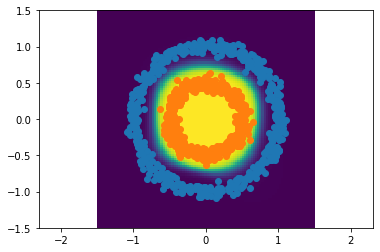

In [81]:
plt.pcolormesh(x0,x1,pY)
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1])
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1])
plt.axis("equal")